In [2]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/prupro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/prupro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/prupro/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/prupro/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package treebank to /Users/prupro/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [3]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import seaborn as sns
from matplotlib import pyplot as plt

# reading the csv data file
articles = pd.read_csv("medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [4]:
articles.shape

(208, 7)

In [5]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


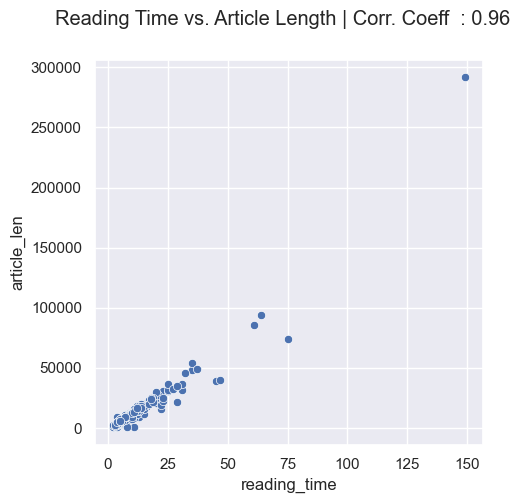

In [6]:
from scipy.stats import pearsonr

articles["article_len"] = articles["text"].apply(lambda x : len(x))
# creating scatterplot
fig, axes = plt.subplots(figsize = (5, 5))
sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

In [7]:
for author, count in dict(articles["author"].value_counts()).items():
    if(count < 2):
        continue
    print("Articles by {} :".format(author))
    for title in articles[articles["author"] == author]["title"].values:
        print(title)
    print("-"*120)

Articles by Adam Geitgey :
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca :
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
------------------------------------------------------------------------------------------------------------------------
Articles by Natassha Selvaraj :
I tripled my income with data science. Here's how.
How to Land a Data Analytics Job in 6 Months
Top 10 Data Science Projects for Beginners
-----------------

In [8]:
import contractions

In [9]:
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

In [10]:
bow_rep = []
vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
print(vocabulary)
for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
print(sentence_rep)

{'wisdom', 'the', 'best', 'times', 'age', 'it', 'and', 'of', 'was', 'foolishness', 'worst'}
{'wisdom': 0, 'the': 0, 'best': 0, 'times': 0, 'age': 0, 'it': 0, 'and': 0, 'of': 0, 'was': 0, 'foolishness': 0, 'worst': 0}


In [11]:
# Using CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
# Learn the vocabulary dictionary and return document-term matrix
bow_rep = cv.fit_transform(corpus).todense()  # todense() returns a matrix
# create dataframe
df = pd.DataFrame(bow_rep)
# Get output feature names for dataframe columns.
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0,0,1,0,1,1,1,1,1,0,0
it was the worst of times,0,0,0,0,1,1,1,1,1,0,1
it was the age of wisdom and the age of foolishness,2,1,0,1,1,2,2,0,1,1,0


In [12]:
# using CountVectorizer for removing stop-words directly from the corpus.
cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()
df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,best,foolishness,times,wisdom,worst
it was the best of times,0,1,0,1,0,0
it was the worst of times,0,0,0,1,0,1
it was the age of wisdom and the age of foolishness,2,0,1,0,1,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using inbuilt TfidfVectorizer() function to calculate TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0.000000,0.000000,0.579897,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.579897
it was the age of wisdom and the age of foolishness,0.617558,0.308779,0.000000,0.308779,0.182370,0.364740,0.364740,0.000000,0.182370,0.308779,0.000000
